In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("Creditcard_data.csv")

fraud = data[data["Class"] == 1]
non_fraud = data[data["Class"] == 0]

non_fraud_sample = non_fraud.sample(len(fraud), random_state=42)
balanced_data = pd.concat([fraud, non_fraud_sample]).sample(frac=1, random_state=42)

samplings=[]
samplings.append(balanced.sample(frac=0.8,random_state=42))
samplings.append(balanced.iloc[::2])
samplings.append(balanced.groupby("Class",group_keys=False).apply(lambda x:x.sample(frac=0.8,random_state=42)))
balanced["cluster"]=balanced.index%4
samplings.append(balanced[balanced["cluster"].isin([0,1])].drop("cluster",axis=1))
samplings.append(balanced.sample(frac=1,replace=True,random_state=42))

models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=1),
    SVC()
]

results = pd.DataFrame(
    index=["M1", "M2", "M3", "M4", "M5"],
    columns=["S1", "S2", "S3", "S4", "S5"]
)

for i in range(len(models)):
    for j in range(len(samplings)):
        X = samplings[j].drop("Class", axis=1)
        y = samplings[j]["Class"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        models[i].fit(X_train, y_train)
        predictions = models[i].predict(X_test)
        results.iloc[i, j] = round(accuracy_score(y_test, predictions) * 100, 2)

print(results)


       S1     S2     S3    S4     S5
M1  100.0  33.33   75.0  20.0  83.33
M2   50.0    0.0   75.0  20.0  83.33
M3  100.0    0.0   75.0  20.0  66.67
M4  100.0  33.33   25.0  40.0   50.0
M5  100.0  33.33  100.0  40.0  66.67


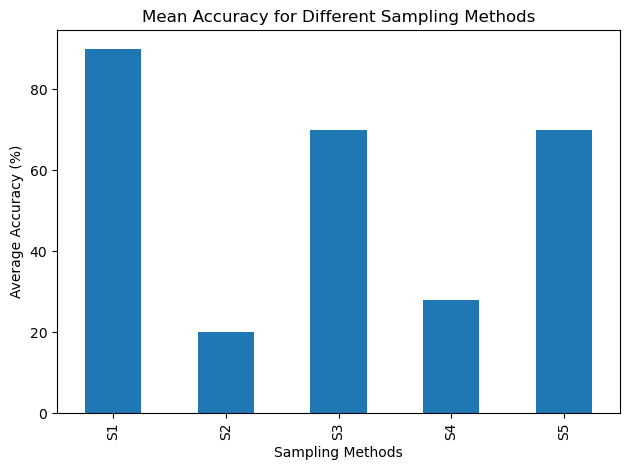

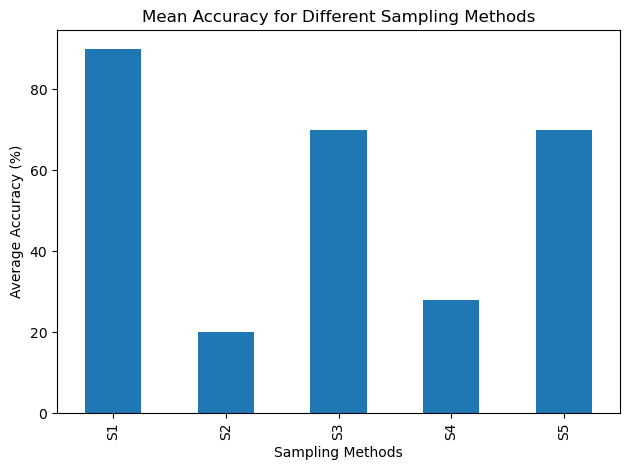

In [9]:
import matplotlib.pyplot as plt

avg_accuracy = results.astype(float).mean()

# Displaying the bar graph for the same
plt.figure()
avg_accuracy.plot(kind="bar")
plt.xlabel("Sampling Methods")
plt.ylabel("Average Accuracy (%)")
plt.title("Mean Accuracy for Different Sampling Methods")
plt.tight_layout()
plt.show()

# For saving  it as an image
plt.figure()
avg_accuracy.plot(kind="bar")
plt.xlabel("Sampling Methods")
plt.ylabel("Average Accuracy (%)")
plt.title("Mean Accuracy for Different Sampling Methods")
plt.tight_layout()
plt.savefig("results.png")
plt.show()
